In [1]:
# Packages 
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from utils.signal_processing import *
from utils.fpp_simulation import *
from utils.plotting import *

---
##### **Filtered Poisson Processes (FPPs) and Kernel Functions**
An FFP is a signal composed of the stochastic superposition of discrete events, the shape of which is determined by a kernel function (also known as an impulse-response function). Kernel functions can take any form, below are a few examples:

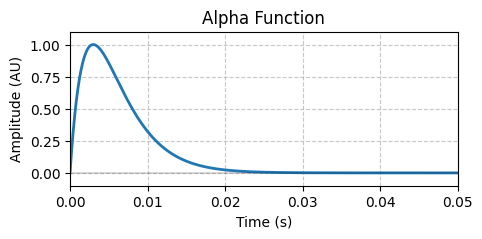

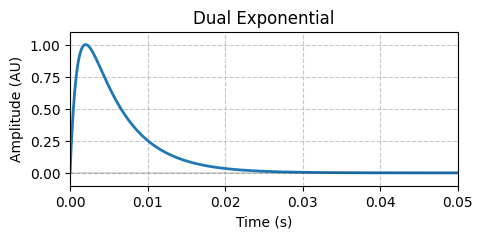

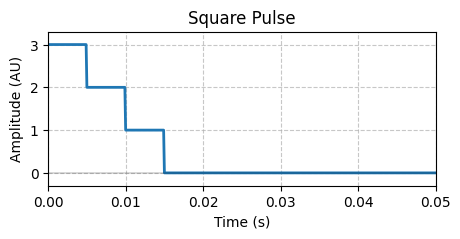

In [2]:
kernel_alpha, time_alpha = alpha_function(t_sec = 0.2,
                                          fs = 10000,
                                          tau_s = 3 / 1000, 
                                          max_amplitude = 1)

kernel_dexp, time_dexp = dual_exponential(t_sec = 0.2, 
                                          fs = 10000, 
                                          tau_rise_s = 1 / 1000,
                                          tau_decay_s = 5 / 1000, 
                                          max_amplitude = 1)

kernel_sq, time_sq = triple_square_kernel(t_sec = 0.2,
                                          fs = 10000, 
                                          t1_s = 5 /  1000, 
                                          t2_s = 10 / 1000,
                                          t3_s = 15 / 1000,
                                          amplitude1 = 3.0, 
                                          amplitude2 = 2.0, 
                                          amplitude3 = 1.0)

plot_trace(kernel_alpha, time_alpha, title = 'Alpha Function')
plot_trace(kernel_dexp, time_dexp, title = 'Dual Exponential')
plot_trace(kernel_sq, time_sq, title = 'Square Pulse')

The total signal is generated by the convolution of a spike train and the kernel function. According to the Convolution Theorem, this translates into a multiplication in the frequency domain. Note that this is the method used to generate signals in a more computationally efficient manner through the Fast Fourier Transform (FFT) (see *utils/fpp.simulation.py*).

- The number of neurons corresponds to the number of independent spike trains

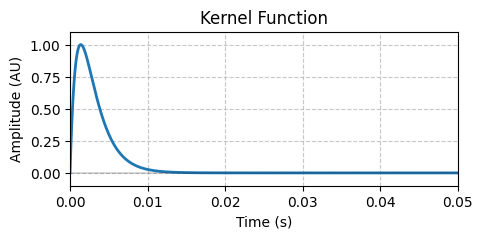

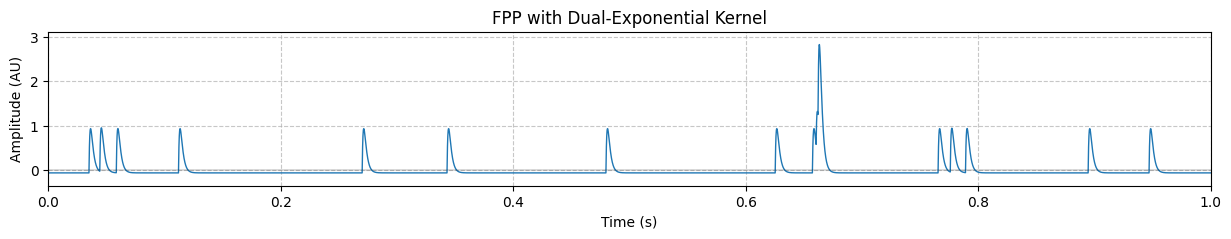

In [3]:
kernel_dexp, time_dexp = dual_exponential(t_sec = 1, 
                                          fs = 10000, 
                                          tau_rise_s = 1 / 1000,
                                          tau_decay_s = 2 / 1000, 
                                          max_amplitude = 1)

signal, time_signal, _ = simulate_fpp(kernel = kernel_dexp,
                                      fs = 10000,
                                      t_sec = 1, 
                                      num_neurons = 1, 
                                      rate = 15)

plot_trace(kernel_dexp, time_dexp, title = 'Kernel Function')
plot_trace(signal, time_signal, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'FPP with Dual-Exponential Kernel')

When the event frequency is low relative to the duration of the kernel function (e.g., 10 events per second), the shape of the individual kernels forming the signal is easy to visualize. However, as the event rate per unit of time increases, a phenomenon of stochastic interference occurs, making it impossible to determine the underlying kernel of the signal.

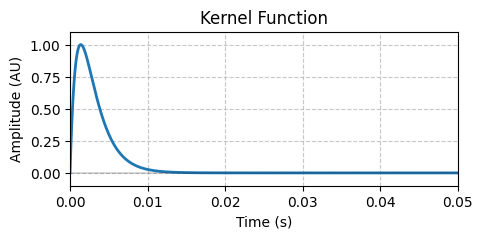

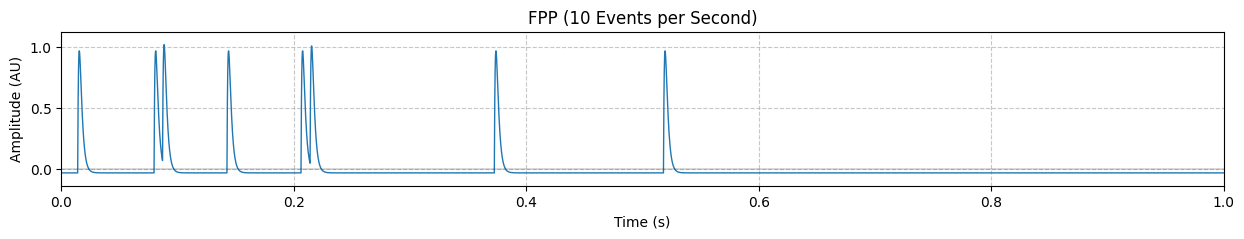

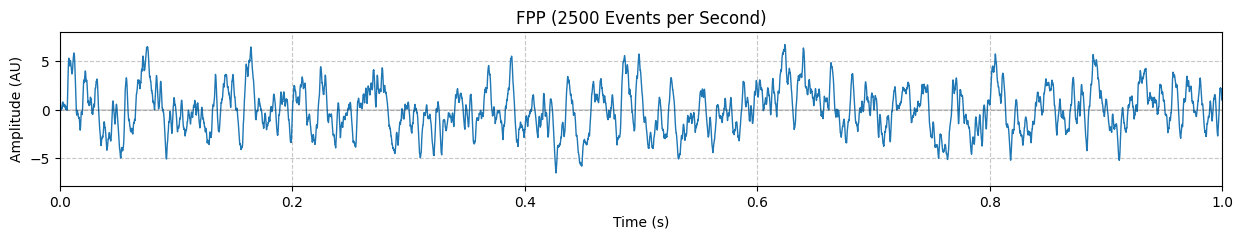

In [4]:
# Same kernel
kernel_dexp, time_dexp = dual_exponential(t_sec = 1, 
                                          fs = 10000, 
                                          tau_rise_s = 1 / 1000,
                                          tau_decay_s = 2 / 1000, 
                                          max_amplitude = 1)

# Low event frequency
signal_lowf, time_signal_lowf, _ = simulate_fpp(kernel = kernel_dexp,
                                                fs = 10000,
                                                t_sec = 1, 
                                                num_neurons = 1, 
                                                rate = 10)

# High event frequency
signal_highf, time_signal_highf, _ = simulate_fpp(kernel = kernel_dexp,
                                                  fs = 10000,
                                                  t_sec = 1, 
                                                  num_neurons = 1, 
                                                  rate = 2500)



plot_trace(kernel_dexp, time_dexp, title = 'Kernel Function')
plot_trace(signal_lowf, time_signal_lowf, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'FPP (10 Events per Second)')
plot_trace(signal_highf, time_signal_highf, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'FPP (2500 Events per Second)')

Importantly, the shape of the kernel is crucial to the dynamics of the resulting signal. Kernels with a longer duration act as a low-pass filter, attenuating high-frequency fluctuations. Conversely, excessively short kernels produce noisier and more stochastic FPPs.

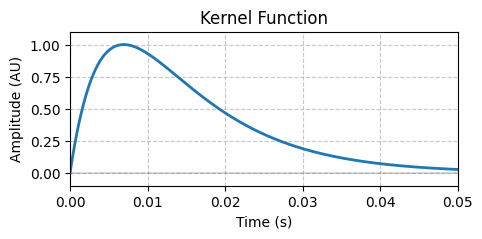

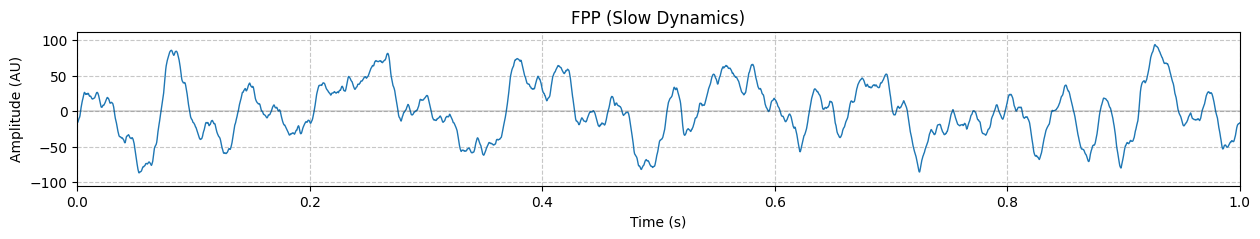

In [5]:
# Slow dynamics
kernel_slow, time_slow = dual_exponential(t_sec = 1, 
                                          fs = 10000, 
                                          tau_rise_s = 5 / 1000,
                                          tau_decay_s = 10 / 1000, 
                                          max_amplitude = 1)

signal_slow, time_signal_slow, _ = simulate_fpp(kernel = kernel_slow,
                                                fs = 10000,
                                                t_sec = 1, 
                                                num_neurons = 2500, 
                                                rate = 50)

plot_trace(kernel_slow, time_slow, title = 'Kernel Function')
plot_trace(signal_slow, time_signal_slow, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'FPP (Slow Dynamics)')

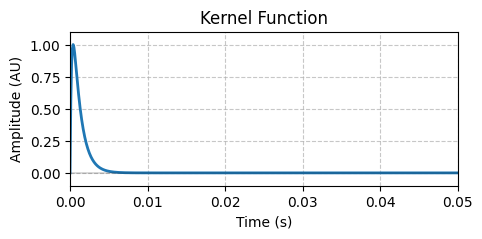

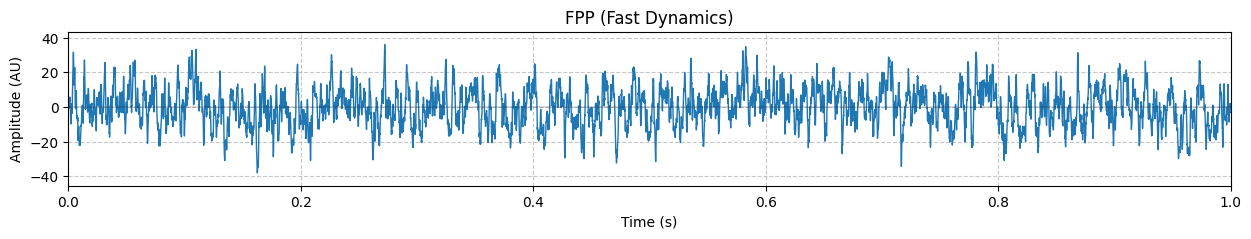

In [6]:
# Fast dynamics
kernel_fast, time_fast = dual_exponential(t_sec = 1, 
                                          fs = 10000, 
                                          tau_rise_s = 0.2 / 1000,
                                          tau_decay_s = 1 / 1000, 
                                          max_amplitude = 1)

signal_fast, time_signal_fast, _ = simulate_fpp(kernel = kernel_fast,
                                                fs = 10000,
                                                t_sec = 1, 
                                                num_neurons = 2500, 
                                                rate = 50)

plot_trace(kernel_fast, time_fast, title = 'Kernel Function')
plot_trace(signal_fast, time_signal_fast, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'FPP (Fast Dynamics)')